In [121]:
import pandas as pd

In [122]:
df = pd.read_csv('E:\CODING\DATASETS\BitCoinForecast\Bitcoin Gold.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2017-11-09,140.514008,156.664993,138.231003,156.664993,13140500.0,USD
1,2017-11-10,157.490005,213.403000,155.391998,213.403000,36198500.0,USD
2,2017-11-11,213.123993,509.811005,213.123993,427.135010,187191008.0,USD
3,2017-11-12,421.750000,465.618011,281.545013,282.407013,90339904.0,USD
4,2017-11-13,277.002991,307.259003,218.339005,249.220993,45916500.0,USD


In [123]:
df.isnull().sum().sum()

0

In [124]:
df.shape

(1748, 7)

In [125]:
df['Date'].max()

'2022-08-23'

In [126]:
df = pd.read_csv('E:\CODING\DATASETS\BitCoinForecast\Bitcoin Gold.csv', index_col='Date')
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2017-11-09,140.514008,156.664993,138.231003,156.664993,13140500.0,USD
2017-11-10,157.490005,213.403000,155.391998,213.403000,36198500.0,USD
2017-11-11,213.123993,509.811005,213.123993,427.135010,187191008.0,USD
2017-11-12,421.750000,465.618011,281.545013,282.407013,90339904.0,USD
2017-11-13,277.002991,307.259003,218.339005,249.220993,45916500.0,USD


In [127]:
df = df.drop(['Currency', 'Open', 'High', 'Low', 'Volume'], axis=1)
df.head()

,Close
Date,
2017-11-09,156.664993
2017-11-10,213.403000
2017-11-11,427.135010
2017-11-12,282.407013
2017-11-13,249.220993


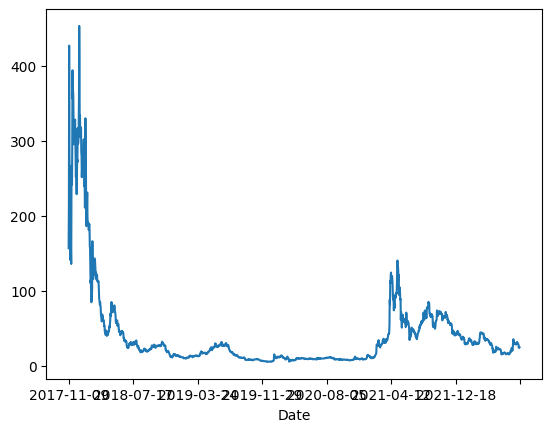

In [128]:
df['Close'].plot();

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test = train_test_split(df,  test_size=0.1)

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()

In [133]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [134]:
X_train.max()

1.0

In [135]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [136]:
n_input = 365
generator = TimeseriesGenerator(X_train, X_train, length=n_input, batch_size=1)

In [137]:
generator

In [138]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [139]:
model = Sequential([
    LSTM(100, activation='relu', input_shape=(365, 1)),
    Dense(1)
])

In [140]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [142]:
hist = model.fit(
    generator, epochs=2
)

Epoch 1/2
1208/1208 [==============================] - 41s 34ms/step - loss: 0.0185
Epoch 2/2
1208/1208 [==============================] - 42s 34ms/step - loss: 0.0185


In [143]:
generator_test = TimeseriesGenerator(X_test, X_test, length=1, batch_size=1)

In [144]:
pred = model.predict(generator_test)

174/174 [==============================] - 0s 793us/step
